# This is the script for Linear Regression Methods

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import linear_model
from pytictoc import TicToc

In [34]:
# changing the directory to where the files are stores
os.chdir('C:\Users\Artin\Google Drive\Courses\Semester 3\EC503 - Learning From Data\Project\King County Data')

In [35]:
X_train = pd.read_csv('X_train_scaled.csv')
y_train = pd.read_csv('y_train_scaled.csv')
X_test = pd.read_csv('X_test_scaled.csv')
y_test = pd.read_csv('y_test_scaled.csv')
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zip_str_98146,zip_str_98148,zip_str_98155,zip_str_98166,zip_str_98168,zip_str_98177,zip_str_98178,zip_str_98188,zip_str_98198,zip_str_98199
0,0.456402,0.34375,0.570375,0.206413,0.2,0.0,0.0,0.630930,0.712414,0.494051,...,0,0,0,0,0,0,0,0,0,0
1,0.393123,0.31250,0.519694,0.360058,0.4,0.0,0.0,0.630930,0.772943,0.574087,...,0,0,0,0,0,0,0,0,0,0
2,0.456402,0.21875,0.464338,0.387997,0.0,0.0,0.0,0.369070,0.712414,0.349580,...,0,0,0,0,0,0,0,0,0,0
3,0.456402,0.31250,0.518475,0.267376,0.4,0.0,0.0,0.630930,0.712414,0.572740,...,0,0,0,0,0,0,0,0,0,0
4,0.508104,0.21875,0.490100,0.363003,0.0,0.0,0.0,0.834044,0.712414,0.450033,...,0,0,0,0,0,0,0,0,0,0


# LASSO

Cross Validation

In [36]:
cv = [] #matrix for storing rmse for different values of alpha
rmse_min = 1
alphas = [0,5e-6,1e-5,2e-5,6e-5,1e-4]
for alpha in alphas:
    reg = linear_model.Lasso(alpha = alpha)
    rmse = -cross_val_score(reg,X_train,y_train,scoring='neg_mean_absolute_error', cv = 4)
    rmse = np.sqrt(rmse.mean())
    cv.append(rmse)
    if rmse <= rmse_min:
        rmse_min = rmse
        alpha_best_lasso = alpha
        
rmse_min, alpha_best_lasso

(0.16972350492548355, 5e-06)

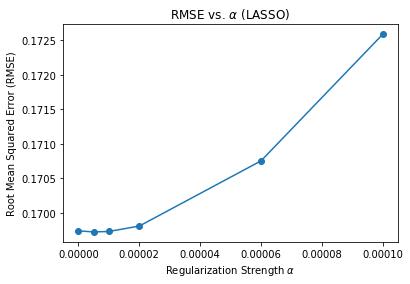

In [37]:
cv = pd.Series(cv,index = alphas)
plt.plot(cv,'-o')
plt.xlabel('Regularization Strength ' r'$ \alpha $ ')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs. ' r'$ \alpha $ ' '(LASSO)')
plt.savefig('LASSO_RMSE_scaled.png',bbox_inches = 'tight')

Training

In [38]:
t = TicToc()
t.tic()
reg = linear_model.Lasso(alpha = alpha_best_lasso)
reg.fit(X_train, y_train)
t.toc()
y_pred = reg.predict(X_test)

MAE_LASSO = mean_absolute_error(y_pred,y_test)
RMSE_LASSO = np.sqrt(mean_squared_error(y_pred,y_test))
R2_LASSO = r2_score(y_pred,y_test)
print MAE_LASSO, RMSE_LASSO, R2_LASSO

Elapsed time is 1.203347 seconds.
0.0288338568118 0.0394262691195 0.866982742302


Plotting the 20 most important features

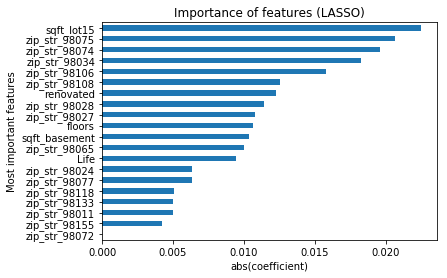

In [39]:
coef = pd.Series(np.abs(reg.coef_), index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(20)])
imp_coef.plot(kind = "barh")
plt.xlabel('abs(coefficient)')
plt.ylabel('Most important features')
plt.title('Importance of features (LASSO)')
plt.savefig('Features_LASSO_scaled.png',bbox_inches = 'tight')

# Robust Regression Huber

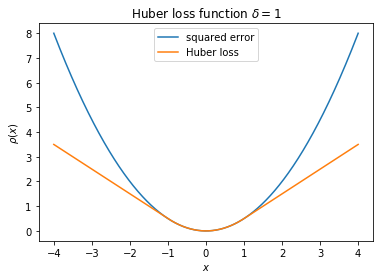

In [64]:
diff = np.linspace(-4, 4, 1000)
plt.plot(diff, .5 * diff ** 2)
plt.plot(diff, np.where(np.abs(diff) < 1, .5 * diff ** 2, np.abs(diff) - .5))
plt.xlabel(r'$ x $')
plt.ylabel(r'$\rho(x)$')
plt.title('Huber loss function $\delta = 1$')
plt.legend(['squared error', 'Huber loss'])
plt.savefig('Huber_loss_function.png',bbox_inches = 'tight')

Cross Validation

In [41]:
cv = [] #matrix for storing rmse for different values of alpha
rmse_min = 1
alphas = [0.1,0.15,0.18,0.2,0.22,0.25,0.3,0.4,0.5,0.6]
for alpha in alphas:
    reg = linear_model.HuberRegressor(alpha = alpha)
    rmse = -cross_val_score(reg,X_train,y_train,scoring='neg_mean_absolute_error', cv = 4)
    rmse = np.sqrt(rmse.mean())
    cv.append(rmse)
    if rmse <= rmse_min:
        rmse_min = rmse
        alpha_best_huber = alpha
        
rmse_min, alpha_best_huber

(0.16936312425202457, 0.22)

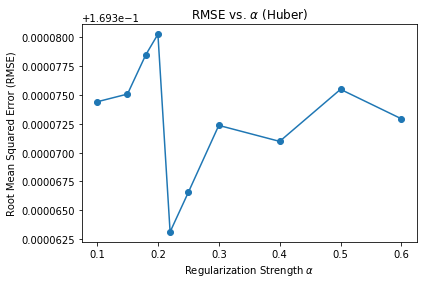

In [42]:
cv = pd.Series(cv,index = alphas)
plt.plot(cv,'-o')
plt.xlabel('Regularization Strength ' r'$ \alpha $ ')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs. ' r'$ \alpha $ ' '(Huber)')
plt.savefig('Huber_RMSE_scaled.png',bbox_inches = 'tight')

Training

In [43]:
t = TicToc()
t.tic()
reg = linear_model.HuberRegressor(alpha = alpha_best_huber)
reg.fit(X_train, y_train)
t.toc()

y_pred = reg.predict(X_test)
MAE_huber = mean_absolute_error(y_pred,y_test)
RMSE_huber = np.sqrt(mean_squared_error(y_pred,y_test))
R2_huber = r2_score(y_pred,y_test)
print MAE_huber, RMSE_huber, R2_huber

Elapsed time is 2.720988 seconds.
0.0287275771821 0.0394678690019 0.864843304941


Plotting the 20 most important features

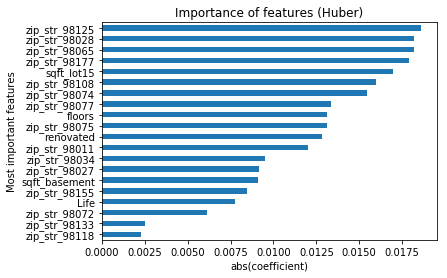

In [44]:
coef = pd.Series(np.abs(np.reshape(reg.coef_,-1)), index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(20)])
imp_coef.plot(kind = "barh")
plt.xlabel('abs(coefficient)')
plt.ylabel('Most important features')
plt.title('ImportancPlotting the 20 most important featurese of features (Huber)')
plt.savefig('Features_Huber_scaled.png',bbox_inches = 'tight')

# Ridge

Cross Validation

In [45]:
cv = []
rmse_min = 1
alphas = [0.1,0.2,0.3,0.4,0.45,0.5,0.6,0.7,1,3,5,10]
for alpha in alphas:
    reg = linear_model.Ridge(alpha = alpha)
    rmse = -cross_val_score(reg,X_train,y_train,scoring='neg_mean_absolute_error', cv = 4)
    rmse = np.sqrt(rmse.mean())
    cv.append(rmse)
    if rmse <= rmse_min:
        rmse_min = rmse
        alpha_best_ridge = alpha
        
rmse_min, alpha_best_ridge

(0.16968961043368438, 1)

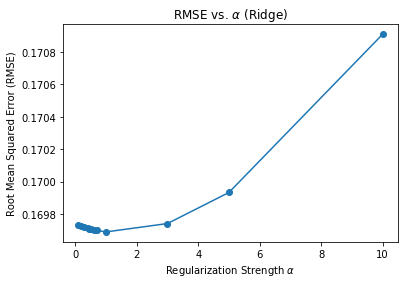

In [46]:
cv = pd.Series(cv,index = alphas)
plt.plot(cv,'-o')
plt.xlabel('Regularization Strength ' r'$ \alpha $ ')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs. ' r'$ \alpha $ ' '(Ridge)')
plt.savefig('Ridge_RMSE_scaled.png',bbox_inches = 'tight')

Training

In [47]:
t = TicToc()
t.tic()
reg = linear_model.Ridge(alpha = alpha_best_ridge)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
t.toc()

MAE_ridge = mean_absolute_error(y_pred,y_test)
RMSE_ridge = np.sqrt(mean_squared_error(y_pred,y_test))
R2_ridge = r2_score(y_pred,y_test)

print MAE_ridge, RMSE_ridge, R2_ridge

Elapsed time is 0.068075 seconds.
0.0288344489847 0.0394237740243 0.86669787019


Important Features

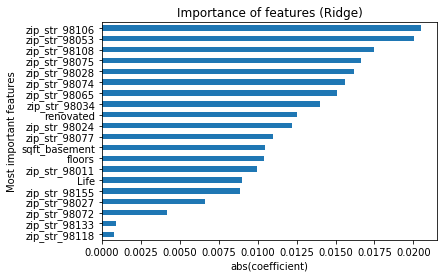

In [48]:
coef = pd.Series(np.abs(np.reshape(reg.coef_,-1)), index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(20)])
imp_coef.plot(kind = "barh")
plt.xlabel('abs(coefficient)')
plt.ylabel('Most important features')
plt.title('Importance of features (Ridge)')
plt.savefig('Features_ridge_scaled.png',bbox_inches = 'tight')

# Ordinary Least Square (OLS)

In [49]:
t = TicToc()
t.tic()
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
t.toc()

MAE_ols = mean_absolute_error(y_pred,y_test)
RMSE_ols = np.sqrt(mean_squared_error(y_pred,y_test))
R2_ols = r2_score(y_pred,y_test)

print MAE_ols, RMSE_ols, R2_ols

Elapsed time is 0.102074 seconds.
0.0288390416283 0.0394235397384 0.867667864599


Important Features

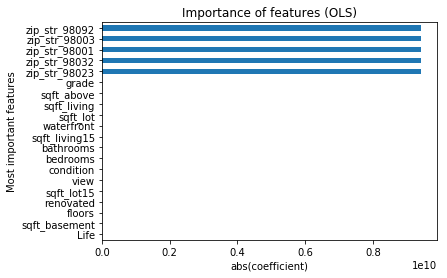

In [52]:
coef = pd.Series(np.abs(np.reshape(reg.coef_,-1)), index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(20)])
imp_coef.plot(kind = "barh")
plt.xlabel('abs(coefficient)')
plt.ylabel('Most important features')
plt.title('Importance of features (OLS)')
plt.savefig('Features_OLS_scaled.png',bbox_inches = 'tight')